In [1]:
import matplotlib.pyplot as plt
import holopy as hp
from holopy.scattering import calc_holo, Sphere
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
import matplotlib as mpl


#axes.xaxis.set_tick_params(direction='in', which='both')
#axes.yaxis.set_tick_params(direction='in', which='both')
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='small')
rc('ytick', labelsize='small')
def cm2inch(value):
    return value/2.54

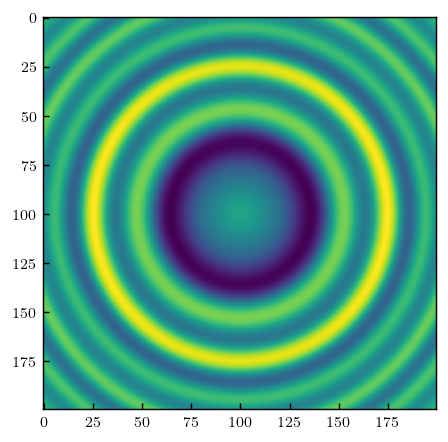

In [3]:

sphere = Sphere(n=1.59, r=1.5, center=(100*0.05, 100*0.05, 12))
# n is the optical index of the particle, r it's radius un microns
# center is its center position in pixel.

medium_index = 1.33
illum_wavelen = 0.532
illum_polarization = (1, 0)
detector = hp.detector_grid(shape=200, spacing=0.05)
# shape is the size in pixel of the camera
# spacing is the pixel's size

holo = calc_holo(
    detector, sphere, medium_index, illum_wavelen, illum_polarization,
)
#the hologram can be directly be plotted using:
plt.imshow(holo.data)

In [4]:
def holo(z, r, n = 1.59):
    sphere = Sphere(n=n, r=r, center=(100*0.05, 100*0.05, z))
    holo = calc_holo(
        detector, sphere, medium_index, illum_wavelen, illum_polarization
    )
    return holo.data
    

In [5]:
radius = [0.5 , 1, 1.5, 2.5]
zs = [5, 10, 15, 20]

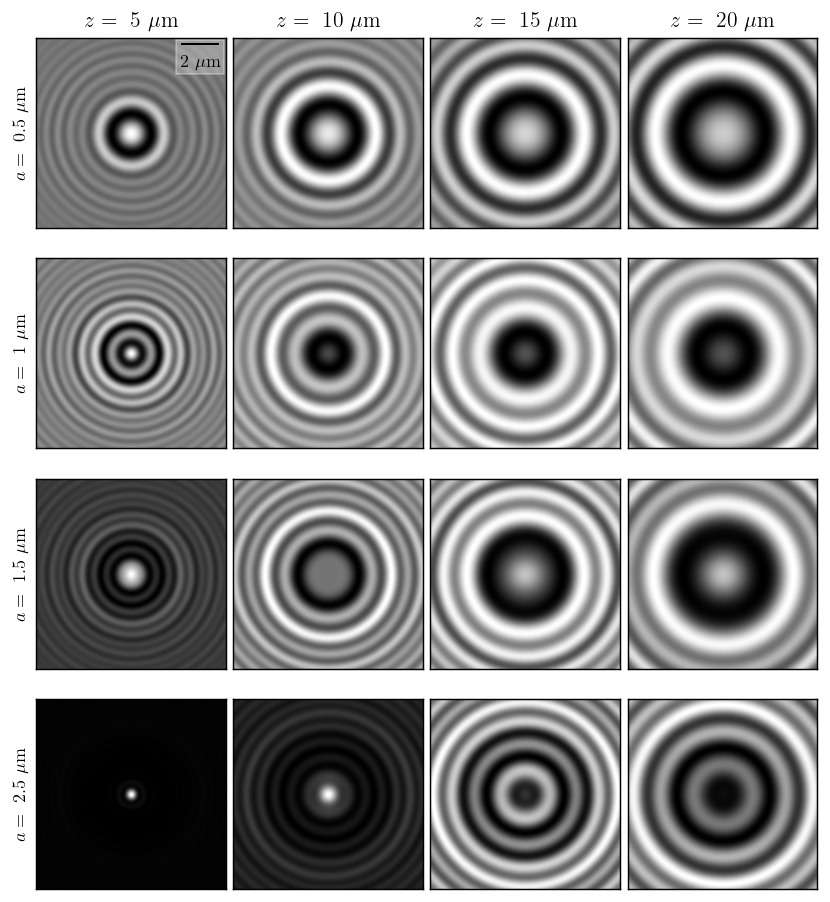

In [6]:
fig = plt.figure(figsize=(cm2inch(16), cm2inch(18)),constrained_layout=False)
gs = fig.add_gridspec(len(radius),len(zs))


for i, r in enumerate(radius):
    for j, z in enumerate(zs):
        fig.add_subplot(gs[i,j])
        plt.imshow(holo(z, r), cmap = "gray")
        
        plt.xticks([])
        plt.yticks([])

        if (i == 0) and (j == 0):
            ax = plt.gca()
            scalebar = ScaleBar(0.05, "um", length_fraction=0.45, box_alpha=0.3)
            ax.add_artist(scalebar)
        if j == 0:
            plt.ylabel("$a =~${} ".format(r) + "$\mathrm{\mu m}$")
        if i == 0:
            plt.title( " " +"$z =~${} ".format(z) + "$\mathrm{\mu m}$")
        
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)

plt.savefig("holos_fix_n.pdf")


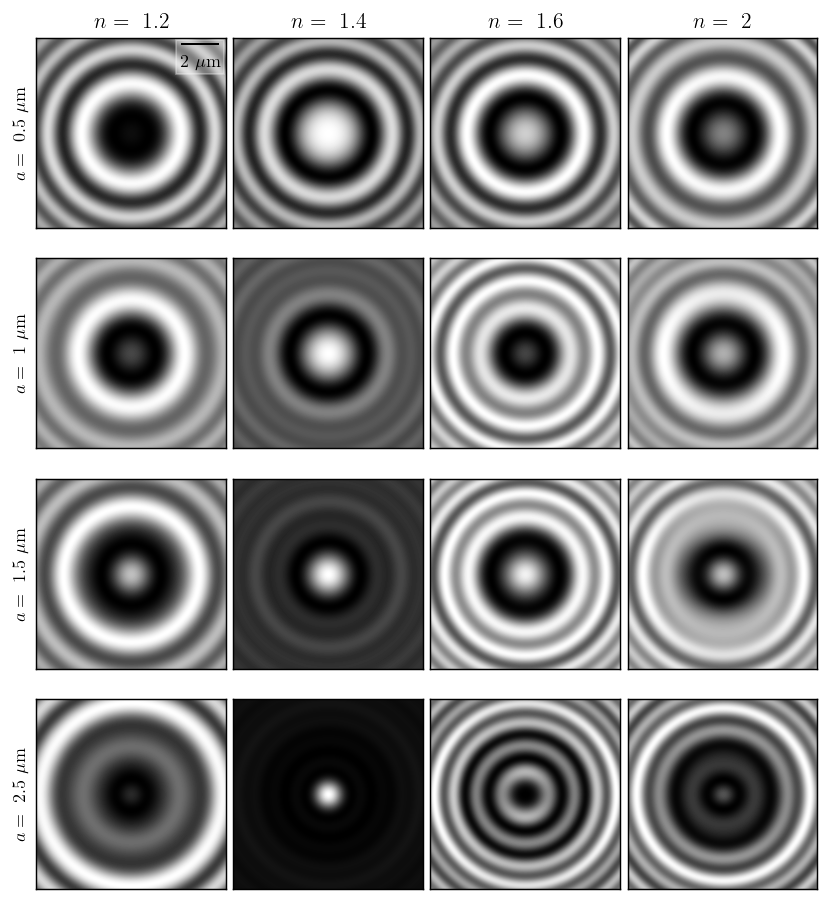

In [7]:
radius = [0.5 , 1, 1.5, 2.5]
ns = [1.2, 1.4, 1.6, 2]

fig = plt.figure(figsize=(cm2inch(16), cm2inch(18)),constrained_layout=False)
gs = fig.add_gridspec(len(radius),len(ns))


for i, r in enumerate(radius):
    for j, n in enumerate(ns):
        fig.add_subplot(gs[i,j])
        plt.imshow(holo(15, r, n), cmap = "gray")
        
        plt.xticks([])
        plt.yticks([])

        if (i == 0) and (j == 0):
            ax = plt.gca()
            scalebar = ScaleBar(0.05, "um", length_fraction=0.45, box_alpha=0.3)
            ax.add_artist(scalebar)
        if j == 0:
            plt.ylabel("$a =~${} ".format(r) + "$\mathrm{\mu m}$")
        if i == 0:
            plt.title("$n =~${} ".format(n))
        
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)

plt.savefig("holos_fix_z.pdf")

In [8]:
radius = [0.5 , 1, 1.5, 2.5]
ns = [1.2, 1.4, 1.6, 2]

for r in radius:
    print([2*r*n/0.532 for n in ns])

[2.2556390977443606, 2.631578947368421, 3.007518796992481, 3.7593984962406015]
[4.511278195488721, 5.263157894736842, 6.015037593984962, 7.518796992481203]
[6.766917293233082, 7.894736842105261, 9.022556390977444, 11.278195488721805]
[11.278195488721805, 13.157894736842104, 15.037593984962406, 18.796992481203006]


# r variation

In [9]:
def holo_line(z, r, n = 1.59, length = 300):
    sphere = Sphere(n=n, r=r, center=(0, 0 , z))
    detector = hp.detector_grid(shape=(length,1), spacing=0.05)
    holo = calc_holo(
        detector, sphere, medium_index, illum_wavelen, illum_polarization
    )
    return holo.data[:,0,0]
    

In [10]:
import numpy as np
radius = np.linspace(0.1, 3, 2000)
length = 300
holos = []

for r in radius:
    holos.append(holo_line(15, r, n=1.59, length=length))


In [11]:
holos = np.reshape(holos, (len(radius), length))

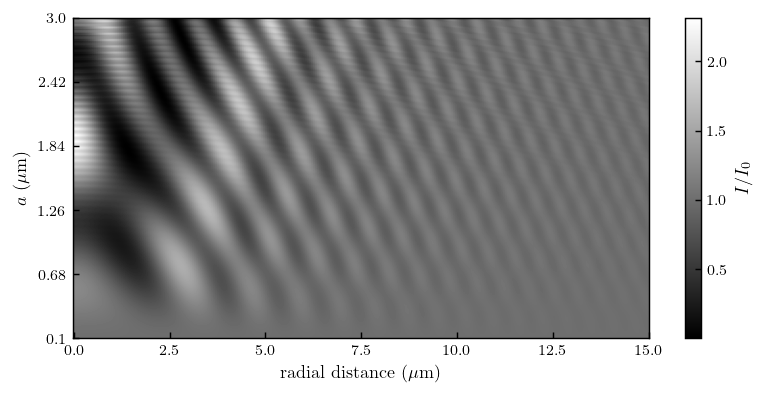

In [12]:
plt.figure(figsize=((cm2inch(16),cm2inch(8))))
ax = plt.gca()
pos = plt.imshow(holos, aspect='auto', origin='lower', cmap = "gray")
a = [0, 400, 800, 1200, 1600 , 1999]
ass = [str(np.around(radius[i],2)) for i in a]
ax.set_yticks(a)
ax.set_yticklabels(ass)
plt.ylabel("$a$ ($\mathrm{\mu m}$)")

a = [0, 50, 100, 150, 200 , 250, 300]
ass = [str(i*0.05) for i in a]
ax.set_xticks(a)
ax.set_xticklabels(ass)
plt.xlabel("radial distance ($\mathrm{\mu m}$)")

cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('$I/I_0$')

plt.tight_layout()

plt.savefig("holos_only_r.pdf")


In [13]:
import numpy as np
ns = np.linspace(1, 2, 2000)
length = 300
holos = []

for n in ns:
    holos.append(holo_line(15, 1.5, n=n, length=length))


In [14]:
holos = np.reshape(holos, (len(radius), length))

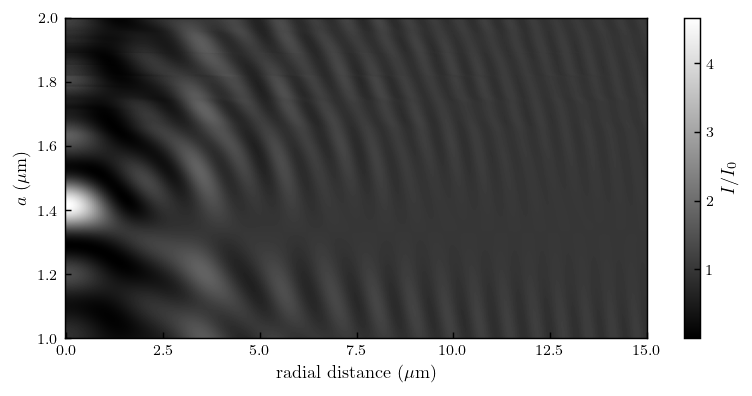

In [15]:
plt.figure(figsize=((cm2inch(16),cm2inch(8))))
ax = plt.gca()
pos = plt.imshow(holos, aspect='auto', origin='lower', cmap = "gray")
a = [0, 400, 800, 1200, 1600 , 1999]
ass = [str(np.around(ns[i],2)) for i in a]
ax.set_yticks(a)
ax.set_yticklabels(ass)
plt.ylabel("$a$ ($\mathrm{\mu m}$)")

a = [0, 50, 100, 150, 200 , 250, 300]
ass = [str(i*0.05) for i in a]
ax.set_xticks(a)
ax.set_xticklabels(ass)
plt.xlabel("radial distance ($\mathrm{\mu m}$)")

cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('$I/I_0$')

plt.tight_layout()

plt.savefig("holos_only_n.pdf")

In [16]:
import numpy as np
zs = np.linspace(5, 30, 2000)
length = 300
holos = []

for z in zs:
    holos.append(holo_line(z, 1.5, n=1.59, length=length))


In [17]:
holos = np.reshape(holos, (len(radius), length))

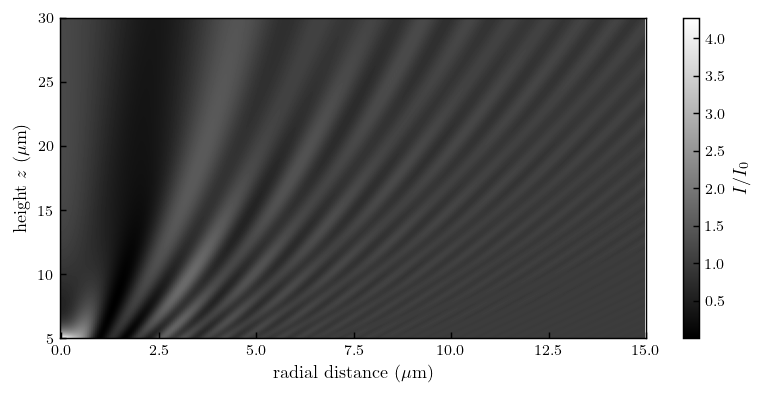

In [18]:
plt.figure(figsize=((cm2inch(16),cm2inch(8))))
ax = plt.gca()
pos = plt.imshow(holos, aspect='auto', origin='lower', cmap = "gray")
a = [0, 400, 800, 1200, 1600 , 1999]
ass = [str(int(zs[i])) for i in a]
ax.set_yticks(a)
ax.set_yticklabels(ass)
plt.ylabel("height $z$ ($\mathrm{\mu m}$)")

a = [0, 50, 100, 150, 200 , 250, 300]
ass = [str(i*0.05) for i in a]
ax.set_xticks(a)
ax.set_xticklabels(ass)
plt.xlabel("radial distance ($\mathrm{\mu m}$)")

cbar = fig.colorbar(pos, ax=ax)
cbar.set_label('$I/I_0$')

plt.tight_layout()

plt.savefig("holos_only_z.pdf")